<a href="https://colab.research.google.com/github/korsakjakub/zacharys_karate_club/blob/main/karate_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import networkx as nx
import matplotlib.cm as cm
import numpy as np

In [220]:
G = nx.karate_club_graph()
initial_states = {n: 0.5 for n in range(1, 33)}
initial_states[0] = 1.0
initial_states[33] = 0.0

nx.set_node_attributes(G, initial_states, "state")
nx.set_edge_attributes(G, 0.5, "weight")

In [208]:
def state_evolution(graph, diffusion_constant, dt):
  new_states = {}
  for h in graph:
    if h == 0:
      new_states[h] = 1.0
      continue
    elif h == 33:
      new_states[h] = 0.0
      continue
    else:
      new_states[h] = diffusion_constant * np.sum([(graph.nodes[g]["state"] - graph.nodes[h]["state"]) * graph[g][h]["weight"] for g in graph[h]]) * dt + graph.nodes[h]["state"]
  return new_states

def weight_evolution(graph, weight_constant, dt):
  new_weights = {}
  def f(x):
    return (x - 0.25)**3
    
  for j in graph:
    for i in graph[j]:
      new_weights[(j, i)] = -weight_constant * graph[i][j]["weight"] * (1 - graph[i][j]["weight"]) * f(abs(graph.nodes[i]["state"] - graph.nodes[j]["state"])) * dt + graph[i][j]["weight"]
  return new_weights

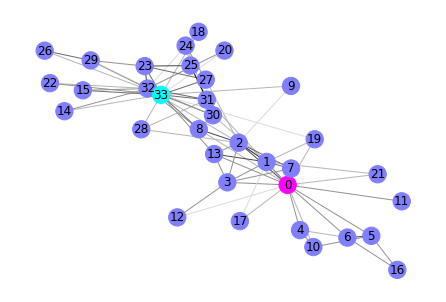

In [270]:
nx.draw_spring(G, cmap = cm.cool, vmin = 0, vmax = 1,with_labels = True, node_color =
[G.nodes[i]['state'] for i in G], edge_cmap = cm.binary, edge_vmin = 0,
edge_vmax = 1,edge_color = [G[i][j]['weight'] for i, j in G.edges])

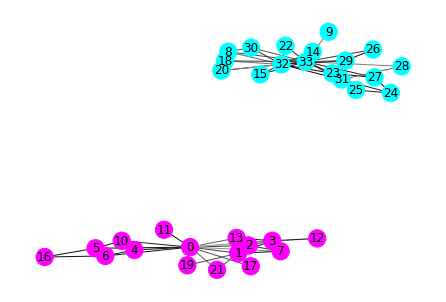

In [272]:
for _ in range(1000):
  new_states = state_evolution(G, 5, 0.01)
  new_weights = weight_evolution(G, 10, 0.01)
  nx.set_node_attributes(G, new_states, "state")
  nx.set_edge_attributes(G, new_weights, "weight")
nx.draw_spring(G, cmap = cm.cool, vmin = 0, vmax = 1,with_labels = True, node_color =
[G.nodes[i]['state'] for i in G.nodes()], edge_cmap = cm.binary, edge_vmin = 0,
edge_vmax = 1,edge_color = [G[i][j]['weight'] for i, j in G.edges])

In [216]:
G.nodes[2]

{'club': 'Mr. Hi', 'state': 1.12597317238549e-143}

In [225]:
import requests

In [268]:
r = np.array(list(map(int, "0 4 5 3 3 3 3 2 2 0 2 3 2 3 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0\
 4 0 6 3 0 0 0 4 0 0 0 0 0 5 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0\
 5 6 0 3 0 0 0 4 5 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 3 0\
 3 3 3 0 0 0 0 3 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 3 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 3 0 0 0 0 0 5 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 3 0 0 0 2 5 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 2 4 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 2 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 4 3\
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2\
 2 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 3 5 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 4\
 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2\
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1\
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 4 0 2 0 0 5 4\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 2 0 0\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 2 0 0 0 0 0 0 7 0 0\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 2\
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 3 0 0 0 0 0 0 0 0 4\
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2\
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 4 0 0 0 0 0 3 2\
 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3\
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 7 0 0 2 0 0 0 4 4\
 0 0 2 0 0 0 0 0 3 0 0 0 0 0 3 3 0 0 1 0 3 0 2 5 0 0 0 0 0 4 3 4 0 5\
 0 0 0 0 0 0 0 0 4 2 0 0 0 3 2 4 0 0 2 1 1 0 3 4 0 0 2 4 2 2 3 4 5 0".split(" "))))
r = r / np.max(r)
initial_weights = np.reshape(r, (34, 34))

In [269]:
initial_weights_dict = {}
for i, _ in enumerate(initial_weights):
  for j, _ in enumerate(initial_weights[i]):
    initial_weights_dict[(i, j)] = initial_weights[i][j]
G = nx.karate_club_graph()
initial_states = {n: 0.5 for n in range(1, 33)}
initial_states[0] = 1.0
initial_states[33] = 0.0

nx.set_node_attributes(G, initial_states, "state")
nx.set_edge_attributes(G, initial_weights_dict, "weight")